In [52]:
import requests,json,datetime
from urllib.parse import quote 
import pandas as pd
import numpy as np
import folium

In [113]:
with open('data/sub_arr_info_key.txt') as f:
    info_key = f.read()

In [114]:
len(info_key)

30

In [115]:
# now = datetime.datetime.now()
# date = now.strftime('%Y%m%d')
# date

In [116]:
# url = "http://openapi.seoul.go.kr:8088/인증키/json/realtimeStationArrival/0/5/20220301(yyyymmdd)"


In [117]:
base_url = "http://swopenAPI.seoul.go.kr/api/subway/"
params1 = f"{info_key}/json/realtimeStationArrival/0/8/"
# params2 = f"{date}"
params2 = quote('병점')
url = f"{base_url}{params1}{params2}"
response = requests.get(url)
print(response.content)


b'{"errorMessage":{"status":200,"code":"INFO-000","message":"\xec\xa0\x95\xec\x83\x81 \xec\xb2\x98\xeb\xa6\xac\xeb\x90\x98\xec\x97\x88\xec\x8a\xb5\xeb\x8b\x88\xeb\x8b\xa4.","link":"","developerMessage":"","total":7},"realtimeArrivalList":[{"beginRow":null,"endRow":null,"curPage":null,"pageRow":null,"totalCount":7,"rowNum":1,"selectedCount":7,"subwayId":"1001","subwayNm":null,"updnLine":"\xec\x83\x81\xed\x96\x89","trainLineNm":"\xea\xb4\x91\xec\x9a\xb4\xeb\x8c\x80\xed\x96\x89 - \xec\x84\xb8\xeb\xa5\x98\xeb\xb0\xa9\xeb\xa9\xb4","subwayHeading":null,"statnFid":"1001080158","statnTid":"1001080156","statnId":"1001080157","statnNm":"\xeb\xb3\x91\xec\xa0\x90","trainCo":null,"ordkey":"01000\xea\xb4\x91\xec\x9a\xb4\xeb\x8c\x800","subwayList":"1001","statnList":"1001080157","btrainSttus":null,"barvlDt":"0","btrainNo":"0476","bstatnId":"171","bstatnNm":"\xea\xb4\x91\xec\x9a\xb4\xeb\x8c\x80","recptnDt":"2023-05-16 17:12:45","arvlMsg2":"\xeb\xb3\x91\xec\xa0\x90 \xeb\x8f\x84\xec\xb0\xa9","arvlMsg3":

In [118]:
response.status_code

200

In [119]:
res = json.loads(response.text)
res

{'errorMessage': {'status': 200,
  'code': 'INFO-000',
  'message': '정상 처리되었습니다.',
  'link': '',
  'developerMessage': '',
  'total': 7},
 'realtimeArrivalList': [{'beginRow': None,
   'endRow': None,
   'curPage': None,
   'pageRow': None,
   'totalCount': 7,
   'rowNum': 1,
   'selectedCount': 7,
   'subwayId': '1001',
   'subwayNm': None,
   'updnLine': '상행',
   'trainLineNm': '광운대행 - 세류방면',
   'subwayHeading': None,
   'statnFid': '1001080158',
   'statnTid': '1001080156',
   'statnId': '1001080157',
   'statnNm': '병점',
   'trainCo': None,
   'ordkey': '01000광운대0',
   'subwayList': '1001',
   'statnList': '1001080157',
   'btrainSttus': None,
   'barvlDt': '0',
   'btrainNo': '0476',
   'bstatnId': '171',
   'bstatnNm': '광운대',
   'recptnDt': '2023-05-16 17:12:45',
   'arvlMsg2': '병점 도착',
   'arvlMsg3': '병점',
   'arvlCd': '1'},
  {'beginRow': None,
   'endRow': None,
   'curPage': None,
   'pageRow': None,
   'totalCount': 7,
   'rowNum': 2,
   'selectedCount': 7,
   'subwayId': '10

In [120]:
res['realtimeArrivalList'][0]

{'beginRow': None,
 'endRow': None,
 'curPage': None,
 'pageRow': None,
 'totalCount': 7,
 'rowNum': 1,
 'selectedCount': 7,
 'subwayId': '1001',
 'subwayNm': None,
 'updnLine': '상행',
 'trainLineNm': '광운대행 - 세류방면',
 'subwayHeading': None,
 'statnFid': '1001080158',
 'statnTid': '1001080156',
 'statnId': '1001080157',
 'statnNm': '병점',
 'trainCo': None,
 'ordkey': '01000광운대0',
 'subwayList': '1001',
 'statnList': '1001080157',
 'btrainSttus': None,
 'barvlDt': '0',
 'btrainNo': '0476',
 'bstatnId': '171',
 'bstatnNm': '광운대',
 'recptnDt': '2023-05-16 17:12:45',
 'arvlMsg2': '병점 도착',
 'arvlMsg3': '병점',
 'arvlCd': '1'}

In [121]:
df = pd.DataFrame(res['realtimeArrivalList'])
df = df[['updnLine','trainLineNm','statnNm','btrainSttus','bstatnNm','arvlMsg2','arvlMsg3','barvlDt','arvlCd']]
df.btrainSttus.fillna('일반',inplace=True)

In [122]:
df

,updnLine,trainLineNm,statnNm,btrainSttus,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd
0,상행,광운대행 - 세류방면,병점,일반,광운대,병점 도착,병점,0,1
1,상행,청량리행 - 세류방면 (급행),병점,급행,청량리 (급행),[8]번째 전역 (평택),평택,0,99
2,상행,광운대행 - 세류방면,병점,일반,광운대,[5]번째 전역 (송탄),송탄,0,99
3,하행,서동탄행 - 세마방면,병점,일반,서동탄,전역 도착,세류,0,5
4,하행,천안행 - 세마방면 (급행),병점,급행,천안 (급행),[2]번째 전역 (수원),수원,0,99
5,하행,천안행 - 세마방면,병점,일반,천안,[4]번째 전역 (성균관대),성균관대,0,99
6,하행,신창행 - 세마방면 (급행),병점,급행,신창 (급행),[15]번째 전역 (가산디지털단지),가산디지털단지,0,99


In [123]:
df.isna().sum()

updnLine       0
trainLineNm    0
statnNm        0
btrainSttus    0
bstatnNm       0
arvlMsg2       0
arvlMsg3       0
barvlDt        0
arvlCd         0
dtype: int64

In [124]:
df1 = df[df.updnLine == '상행']
df1

,updnLine,trainLineNm,statnNm,btrainSttus,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd
0,상행,광운대행 - 세류방면,병점,일반,광운대,병점 도착,병점,0,1
1,상행,청량리행 - 세류방면 (급행),병점,급행,청량리 (급행),[8]번째 전역 (평택),평택,0,99
2,상행,광운대행 - 세류방면,병점,일반,광운대,[5]번째 전역 (송탄),송탄,0,99


In [125]:
df2 = df[df.updnLine == '하행']
df2

,updnLine,trainLineNm,statnNm,btrainSttus,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd
3,하행,서동탄행 - 세마방면,병점,일반,서동탄,전역 도착,세류,0,5
4,하행,천안행 - 세마방면 (급행),병점,급행,천안 (급행),[2]번째 전역 (수원),수원,0,99
5,하행,천안행 - 세마방면,병점,일반,천안,[4]번째 전역 (성균관대),성균관대,0,99
6,하행,신창행 - 세마방면 (급행),병점,급행,신창 (급행),[15]번째 전역 (가산디지털단지),가산디지털단지,0,99


In [126]:
temp = input()
temp = temp[:-1] if temp[-1] =='역' else temp
temp

'수원'

In [143]:
target = input('역명 입력')
target = target[:-1] if target[-1] == '역' else target

In [144]:
base_url = "http://swopenAPI.seoul.go.kr/api/subway/"
params1 = f"{info_key}/json/realtimeStationArrival/0/8/"
params2 = quote(target)
url = f"{base_url}{params1}{params2}"
response = requests.get(url)
print(response.content)

b'{"errorMessage":{"status":200,"code":"INFO-000","message":"\xec\xa0\x95\xec\x83\x81 \xec\xb2\x98\xeb\xa6\xac\xeb\x90\x98\xec\x97\x88\xec\x8a\xb5\xeb\x8b\x88\xeb\x8b\xa4.","link":"","developerMessage":"","total":7},"realtimeArrivalList":[{"beginRow":null,"endRow":null,"curPage":null,"pageRow":null,"totalCount":7,"rowNum":1,"selectedCount":7,"subwayId":"1001","subwayNm":null,"updnLine":"\xec\x83\x81\xed\x96\x89","trainLineNm":"\xea\xb4\x91\xec\x9a\xb4\xeb\x8c\x80\xed\x96\x89 - \xec\x84\xb8\xeb\xa5\x98\xeb\xb0\xa9\xeb\xa9\xb4","subwayHeading":null,"statnFid":"1001080158","statnTid":"1001080156","statnId":"1001080157","statnNm":"\xeb\xb3\x91\xec\xa0\x90","trainCo":null,"ordkey":"01000\xea\xb4\x91\xec\x9a\xb4\xeb\x8c\x800","subwayList":"1001","statnList":"1001080157","btrainSttus":null,"barvlDt":"0","btrainNo":"0476","bstatnId":"171","bstatnNm":"\xea\xb4\x91\xec\x9a\xb4\xeb\x8c\x80","recptnDt":"2023-05-16 17:12:45","arvlMsg2":"\xeb\xb3\x91\xec\xa0\x90 \xeb\x8f\x84\xec\xb0\xa9","arvlMsg3":

In [145]:
df = pd.DataFrame(res['realtimeArrivalList'])
df = df[['updnLine','trainLineNm','statnNm','bstatnNm','arvlMsg2','arvlMsg3','barvlDt','arvlCd']]

In [146]:
df

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd
0,상행,광운대행 - 세류방면,병점,광운대,병점 도착,병점,0,1
1,상행,청량리행 - 세류방면 (급행),병점,청량리 (급행),[8]번째 전역 (평택),평택,0,99
2,상행,광운대행 - 세류방면,병점,광운대,[5]번째 전역 (송탄),송탄,0,99
3,하행,서동탄행 - 세마방면,병점,서동탄,전역 도착,세류,0,5
4,하행,천안행 - 세마방면 (급행),병점,천안 (급행),[2]번째 전역 (수원),수원,0,99
5,하행,천안행 - 세마방면,병점,천안,[4]번째 전역 (성균관대),성균관대,0,99
6,하행,신창행 - 세마방면 (급행),병점,신창 (급행),[15]번째 전역 (가산디지털단지),가산디지털단지,0,99


In [131]:
# 상행 하행 따로 보여줌
# folium marker로 지하철역 찝기(전,후 다른 마커)


In [147]:
# 처음에 한번 실행될 부분
df_st = pd.read_csv('data/St_addr_20221122.csv',encoding='euc-kr')
df_st = df_st[['역명','도로명주소']]
df_st.head()

,역명,도로명주소
0,가능,경기도 의정부시 평화로 633
1,가산디지털단지,서울특별시 금천구 벚꽃로 309
2,간석,인천광역시 남동구 석정로 522-14
3,개봉,서울특별시 구로구 경인로40길 47
4,관악,경기도 안양시 만안구 경수대로1273번길 46


In [124]:

# dfn = df_st[df_st.역명.str.contains('\(')].replace('\(',' ',inplace=True)
dfn = df_st[df_st.역명.str.contains('\(')].copy()
dfn = dfn.역명.apply(lambda x:x.replace('\(', ' ')).apply(lambda x:x.split()[0])
# dfn = dfn[dfn.역명].replace('\(',' ').apply(lambda x:x.split()[:1])
dfn

57           신창(순천향대)
58           쌍용(나사렛대)
128       기흥(백남준아트센터)
137       미금(분당서울대병원)
139         복정(동서울대학)
141         상갈(루터대학교)
145     선정릉(한국과학창의재단)
148         수내(한국잡월드)
151    수원시청(경기도문화의전당)
152         숭의(인하대병원)
162           영통(경희대)
169        이매(성남아트센터)
175           죽전(단국대)
184       가평(자라섬·남이섬)
188        굴봉산(제이드가든)
191          남춘천(강원대)
195       백양리(엘리시안강촌)
196         별내(삼육대학교)
199          상천(호명호수)
205           춘천(한림대)
234      아신(아세아연합신학대)
237       양원(서울시북부병원)
248           원덕(추읍산)
249         월롱(서영대학교)
258          파주(두원대학)
264         화전(한국항공대)
277       판교(판교테크노밸리)
279        거제(법원·검찰청)
Name: 역명, dtype: object

In [148]:
temp = df_st[df_st.역명 == target].도로명주소
temp

35    경기도 화성시 떡전골로 97
Name: 도로명주소, dtype: object

In [149]:
str_addr = df_st[df_st.역명 == target].도로명주소.values[-1]
str_addr.strip()


'경기도 화성시 떡전골로 97'

In [81]:
df1 = df[df.updnLine == '상행']
df1 = df1.reset_index(drop=True)
df1

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd
0,상행,광운대행 - 세류방면,병점,광운대,병점 도착,병점,0,1
1,상행,청량리행 - 세류방면 (급행),병점,청량리 (급행),[6]번째 전역 (서정리),서정리,0,99
2,상행,광운대행 - 세류방면,병점,광운대,[4]번째 전역 (진위),진위,0,99
3,상행,청량리행 - 세류방면 (급행),병점,청량리 (급행),[11]번째 전역 (두정),두정,0,99


In [77]:
df2 = df[df.updnLine == '하행']
df2 = df2.reset_index(drop=True)
df2

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd
0,하행,신창행 - 세마방면,병점,신창,병점 도착,병점,0,1
1,하행,천안행 - 세마방면 (급행),병점,천안 (급행),[4]번째 전역 (성균관대),성균관대,0,99
2,하행,서동탄행 - 세마방면,병점,서동탄,전역 도착,세류,0,5
3,하행,천안행 - 세마방면 (급행),병점,천안 (급행),[15]번째 전역 (가산디지털단지),가산디지털단지,0,99


In [67]:
df1.arvlMsg3[1].strip()

'서정리'

In [68]:
bstn_up_list = df1.arvlMsg3.values
bstn_up_list

array(['병점', '서정리', '진위', '두정'], dtype=object)

In [69]:
bstn_dn_list = df2.arvlMsg3.values
bstn_dn_list

array(['병점', '성균관대', '세류', '가산디지털단지'], dtype=object)

In [70]:
# 함수로 쓸때 return bst
# for i,bst in enumerate(bstn_up_list):
#     try:
#         bst = df1.arvlMsg3[i].strip()
#         print(bst)
#     except:
#         bst = None

In [71]:
# for i,bst in enumerate(bstn_dn_list):
#     try:
#         bst = df2.arvlMsg3[i].strip()
#         print(bst)
#     except:
#         bst = None

In [72]:
# 함수로 만들어서 쓸땐 변수자리에 return 아니면 리스트의 딕트로 반환?
up_lines = []
for i in df1.index:
    try:
        bst = df1.arvlMsg3[i].strip()
        msg = df1.arvlMsg2[i].strip()
        print(f'{bst}\t{msg}')
        up_lines.append({'bst':bst,'msg':msg})
    except:
        bst = None

병점	병점 도착
서정리	[6]번째 전역 (서정리)
진위	[4]번째 전역 (진위)
두정	[11]번째 전역 (두정)


In [73]:
dn_lines = []
for i in df2.index:
    try:
        bst = df2.arvlMsg3[i].strip()
        msg = df2.arvlMsg2[i].strip()
        print(f'{bst}\t{msg}')
        dn_lines.append({'bst':bst,'msg':msg})
    except:
        bst = None

병점	병점 도착
성균관대	[4]번째 전역 (성균관대)
세류	전역 도착
가산디지털단지	[15]번째 전역 (가산디지털단지)


In [74]:
up_lines,dn_lines

([{'bst': '병점', 'msg': '병점 도착'},
  {'bst': '서정리', 'msg': '[6]번째 전역 (서정리)'},
  {'bst': '진위', 'msg': '[4]번째 전역 (진위)'},
  {'bst': '두정', 'msg': '[11]번째 전역 (두정)'}],
 [{'bst': '병점', 'msg': '병점 도착'},
  {'bst': '성균관대', 'msg': '[4]번째 전역 (성균관대)'},
  {'bst': '세류', 'msg': '전역 도착'},
  {'bst': '가산디지털단지', 'msg': '[15]번째 전역 (가산디지털단지)'}])

In [ ]:
# [kko_local(dn['bst'], dn['msg']) for dn in dn_lines]

In [39]:
def kakao_location(place):
    with open('../04.지도시각화/data/kakaoapikey.txt') as f_:
        kakao_key = f_.read()
    base_url = "https://dapi.kakao.com/v2/local/search/address.json"
    url = f'{base_url}?query={quote(place)}'
    header = {'Authorization':f'KakaoAK {kakao_key}'}
    result = requests.get(url, headers=header).json()
    lat_ = float(result['documents'][0]['y'])
    lng_ = float(result['documents'][0]['x'])
    return lat_,lng_

In [49]:
def rtn_addr(target):
    str_addr = df_st[df_st.역명 == target].도로명주소.values[-1]
    return str_addr.strip()

In [50]:
up_lines_list = []
for up in up_lines:
    up_lines_list.append({'bst':up['bst'],'msg':up['msg'],'local':kakao_location(rtn_addr(up['bst']))})
up_lines_list

[{'bst': '병점', 'msg': '병점 도착', 'local': (37.2068017946815, 127.033243427141)},
 {'bst': '서정리',
  'msg': '[6]번째 전역 (서정리)',
  'local': (37.0570033704623, 127.053006355073)},
 {'bst': '진위',
  'msg': '[4]번째 전역 (진위)',
  'local': (37.1099375555493, 127.062366903315)},
 {'bst': '두정',
  'msg': '[11]번째 전역 (두정)',
  'local': (36.8329346310528, 127.149020699344)}]

In [51]:
dn_lines_list = []
for dn in dn_lines:
    dn_lines_list.append({'bst':dn['bst'],'msg':dn['msg'],'local':kakao_location(rtn_addr(dn['bst']))})
dn_lines_list

[{'bst': '병점', 'msg': '병점 도착', 'local': (37.2068017946815, 127.033243427141)},
 {'bst': '성균관대',
  'msg': '[4]번째 전역 (성균관대)',
  'local': (37.3001863040678, 126.972261050259)},
 {'bst': '세류', 'msg': '전역 도착', 'local': (37.2446548766964, 127.01397825425)},
 {'bst': '가산디지털단지',
  'msg': '[15]번째 전역 (가산디지털단지)',
  'local': (37.4815957375443, 126.882559483336)}]

In [59]:
for i in df1.index:
    bst = df1.arvlMsg3[i].strip()
    print(bst) if i == 2 else print()



진위



In [82]:
# apply kakao local
temp1 =[]
for i in df1.index:
    bst = df1.arvlMsg3[i].strip()
    temp1.append(kakao_location(rtn_addr(bst)))

df_test = pd.DataFrame(temp1,columns=('lat','lng'))
df1 = pd.concat([df1, df_test], axis=1)
df1

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd,lat,lng
0,상행,광운대행 - 세류방면,병점,광운대,병점 도착,병점,0,1,37.206802,127.033243
1,상행,청량리행 - 세류방면 (급행),병점,청량리 (급행),[6]번째 전역 (서정리),서정리,0,99,37.057003,127.053006
2,상행,광운대행 - 세류방면,병점,광운대,[4]번째 전역 (진위),진위,0,99,37.109938,127.062367
3,상행,청량리행 - 세류방면 (급행),병점,청량리 (급행),[11]번째 전역 (두정),두정,0,99,36.832935,127.149021


In [80]:
# apply kakao local
temp1 =[]
for i in df2.index:
    bst = df2.arvlMsg3[i].strip()
    temp1.append(kakao_location(rtn_addr(bst)))

df_test = pd.DataFrame(temp1,columns=('lat','lng'))
df2 = pd.concat([df2, df_test], axis=1)
df2

,updnLine,trainLineNm,statnNm,bstatnNm,arvlMsg2,arvlMsg3,barvlDt,arvlCd,lat,lng
0,하행,신창행 - 세마방면,병점,신창,병점 도착,병점,0,1,37.206802,127.033243
1,하행,천안행 - 세마방면 (급행),병점,천안 (급행),[4]번째 전역 (성균관대),성균관대,0,99,37.300186,126.972261
2,하행,서동탄행 - 세마방면,병점,서동탄,전역 도착,세류,0,5,37.244655,127.013978
3,하행,천안행 - 세마방면 (급행),병점,천안 (급행),[15]번째 전역 (가산디지털단지),가산디지털단지,0,99,37.481596,126.882559


In [86]:
lat,lng = kakao_location(rtn_addr(target))
print(target,lat,lng)

두정 36.8329346310528 127.149020699344



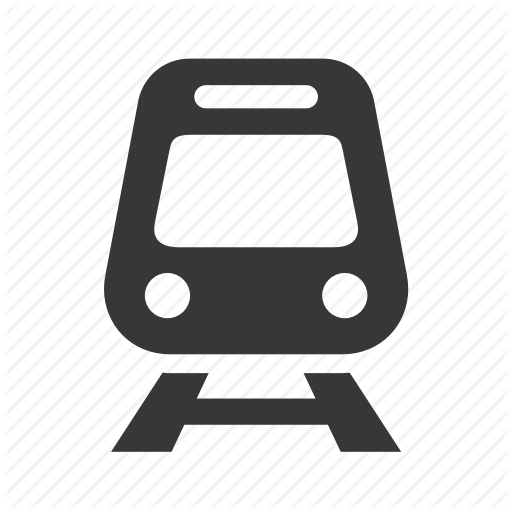
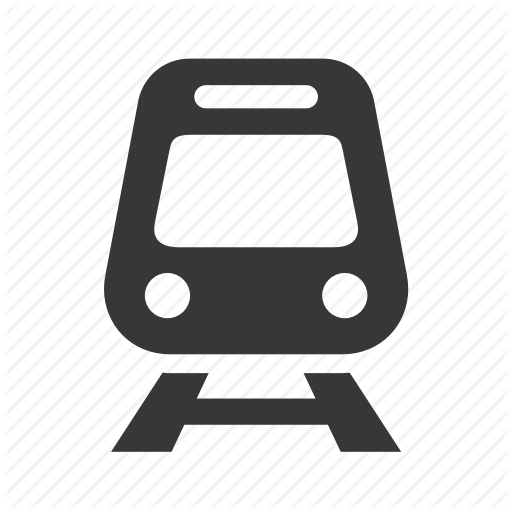
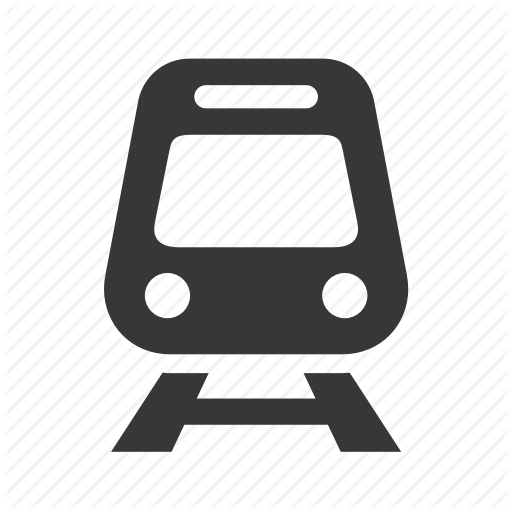
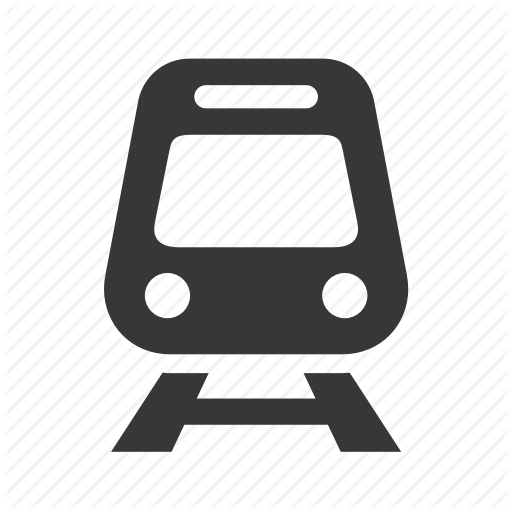

In [85]:
unii = folium.Map(location=[lat,lng],zoom_start=12)
for i in df1.index:
    pushpin = folium.CustomIcon(f'data/micon.jpg', icon_size=(40,40))
    folium.Marker(
        location=[df1.lat[i], df1.lng[i]],                     
        popup=folium.Popup(df.arvlMsg2[i],max_width=300),
        tooltip=df.arvlMsg3[i],
        icon=pushpin
    ).add_to(unii)
title_html = '<h3 align="center" style="font-size:20px">지하철 실시간 도착</h3>'
unii.get_root().html.add_child(folium.Element(title_html))
unii